In [2]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

mpl.rcParams['figure.facecolor'] = 'white'

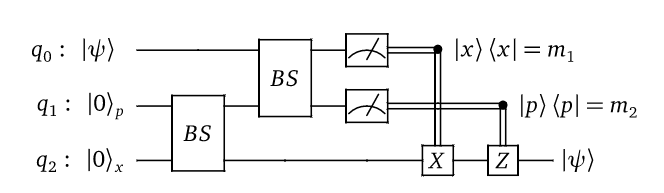

[[-3.93058418  3.60229621]]


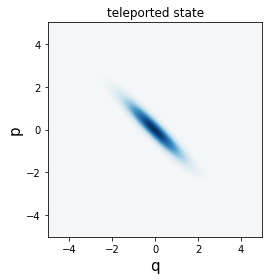

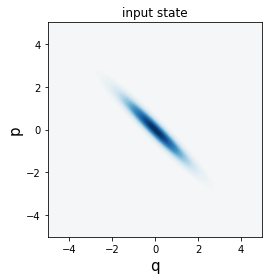

fidelity 0.9901062529518891


In [18]:
# teleportation
prog = sf.Program(3)

alpha = 1j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    Squeezed(r, phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]
    
    BSgate(np.pi/4, np.pi) | (q[1], q[2])
    BSgate(np.pi/4, np.pi) | (q[0], q[1])
    
    MeasureX | q[0]
    MeasureP | q[1]
    
    Xgate(np.sqrt(2) * q[0].par) | q[2]
    Zgate(-np.sqrt(2) * q[1].par) | q[2]

eng = sf.Engine('gaussian')#, backend_options={"cutoff_dim": 15})
result = eng.run(prog, shots=1, modes=None, compile_options={})

print(result.samples)

quad_axis = np.linspace(-5, 5, 1000)
W = result.state.wigner(mode=2, xvec=quad_axis * sf.hbar, pvec=quad_axis * sf.hbar)

color_range = np.max(W.real)
nrm = mpl.colors.Normalize(-color_range, color_range)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, W, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel("q", fontsize=15)
plt.ylabel("p", fontsize=15)
plt.title('teleported state')
plt.tight_layout()
plt.show()

# drawing the wigner function of the input state
prog0 = sf.Program(1)

with prog0.context as q:
    Squeezed(r, phi) | q[0]
    
eng0 = sf.Engine('gaussian')#, backend_options={"cutoff_dim": 15})
state0 = eng0.run(prog0, shots=1, modes=None, compile_options={}).state

W0 = state0.wigner(mode=0, xvec=quad_axis * sf.hbar, pvec=quad_axis * sf.hbar)

color_range = np.max(W0.real)
nrm = mpl.colors.Normalize(-color_range, color_range)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, W0, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel("q", fontsize=15)
plt.ylabel("p", fontsize=15)
plt.title('input state')
plt.tight_layout()
plt.show()

print('fidelity ' + str(result.state.fidelity((state0.means(), state0.cov()), mode=2)))